<a href="https://colab.research.google.com/github/jessamcs/Week7_Classification/blob/main/NewClassificationMetricCore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#NEW CLASSIFICATION METRIC CORE

In [ ]:
#Prepare the data for modeling and validation
#Train-test split.  Set the random state to 42

#Create a pipeline with a StandardScaler and a KNeighborsClassifier
#Create another pipeline with StandardScaler and DummyClassifier

#Fit both model pipelines and save their predictions test sets

#Print the accuracy of both models on the test set

#Print the recall scores of both models.

#Print the precision scores of both models.

#Use sns.heatmap() to plot the confusion matrices from above.  
#Set annot = True to see the numbers, and change the colormap to something easier to read
#with cmap='Greens' (or whatever color map you like)

#Recreate the confusion matrix above, but with the values normalized along the 'true' axis.

#Use classifiction_report() to print a report of several metrics for all classes at once
#for both models

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('/content/cancer (1).csv')
print('Dataset :',data.shape)
x = data.iloc[:, [0, 1, 2, 3]].values
data.info()
data[0:10]

Dataset : (569, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perime

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


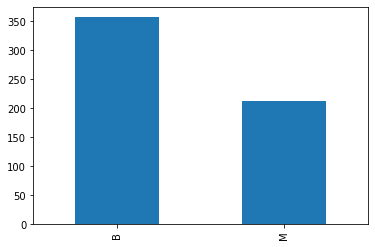

In [3]:
data.diagnosis.value_counts()[0:30].plot(kind='bar')
plt.show()

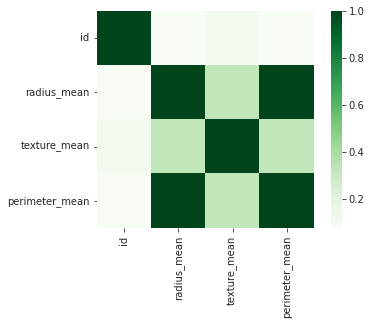

In [8]:
#Use sns.heatmap() to plot the confusion matrices from above.  
#Set annot = True to see the numbers, and change the colormap to something easier to read
#with cmap='Greens' (or whatever color map you like)
data = data[['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean']] #Subsetting the data
cor = data.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True, cmap ='Greens') #Plot the correlation as heat map

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


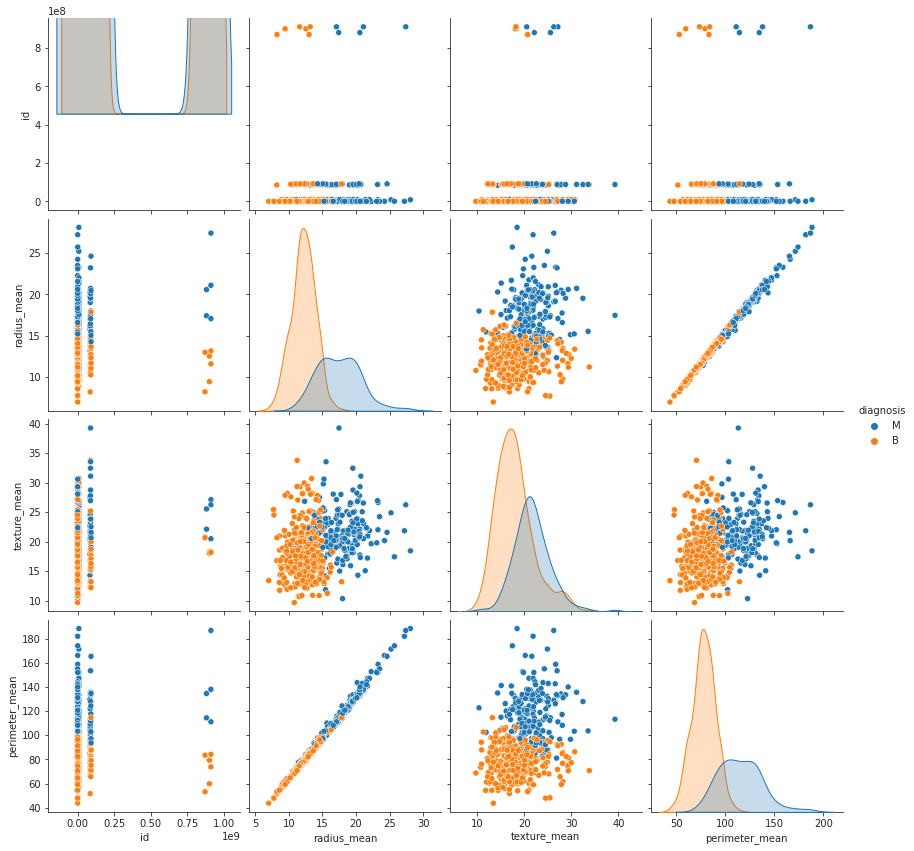

In [10]:
sns.set_style("ticks")
sns.pairplot(data,hue="diagnosis",size=3);
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
Y = data['diagnosis']
X = data.drop(columns=['diagnosis'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [12]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (455, 4)
Y train shape:  (455,)
X test shape:  (114, 4)
Y test shape:  (114,)


In [13]:
#Logistic Regression Coding
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=10)
logreg.fit(X_train, Y_train)
Y_predict1 = logreg.predict(X_test)

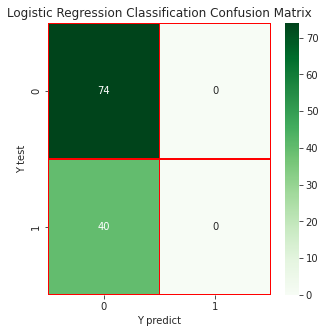

In [15]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

logreg_cm = confusion_matrix(Y_test, Y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="Greens")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [16]:
# Test score for Logistic regression
score_logreg = logreg.score(X_test, Y_test)
print(score_logreg)

0.6491228070175439


In [19]:
from sklearn.neighbors import KNeighborsClassifier

knncla = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
knncla.fit(X_train, Y_train)
Y_predict6 = knncla.predict(X_test)

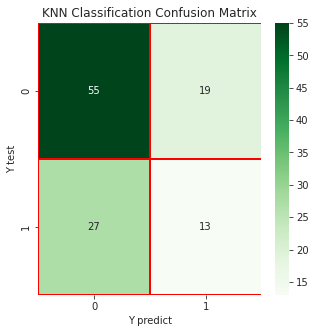

In [21]:
# The confusion matrix
knncla_cm = confusion_matrix(Y_test, Y_predict6)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="Greens")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [22]:
# Test score for KNN Regression
score_knncla= knncla.score(X_test, Y_test)
print(score_knncla)

0.5964912280701754


In [32]:
#precision and recall
#from sklearn.metrics import average_precision_score
#average_precision = average_precision_score(Y_test, Y_predict6)
#print('Average precision-recall score: {0:0.2f}'.format(
 #  \\   average_precision))